In [1]:
from numpy import array, log, exp, zeros, size, linspace, loadtxt, pi, sqrt, copy, dot, transpose, diag, ones
from numpy.linalg import pinv, det, inv
from scipy.integrate import quad
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from itertools import product, combinations_with_replacement

9001


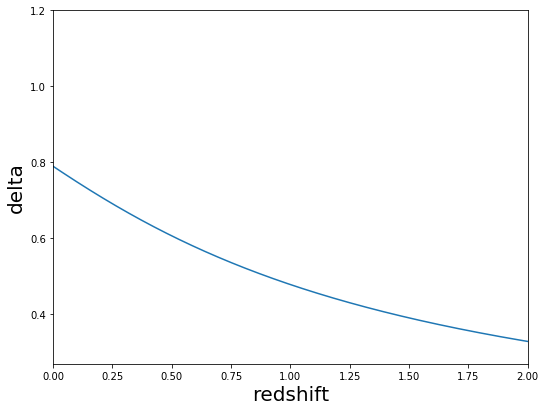

In [2]:
## here you can find out Runge-Kutta method to solve our ODE. 
## you can change the models also. maybe there is some problem with the initial values. 
##but the result is good.

from math import sqrt, exp
import matplotlib.pyplot as plt

OmgM = 0.32

def E_inverse(z):
    Ez = np.sqrt((1-OmgM)+ (OmgM * np.power(1 + z,3)))
    return 1. / Ez



def omega_M(z):
    omega = OmgM*((1+z)**3)* ((E_inverse(z))**2)
    return omega

def E_inverse3(a):
    Ez = np.sqrt((1-OmgM)+ (OmgM/(a**3) ))
    return 1. / Ez


def omega_M3(a):
    omega = (OmgM* ((E_inverse3(a))**2))/(a**3)
    return omega

def RungeKutta4(x0, xn, y0, z0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    ylist = [0] * (n + 1)
    zlist = [0] * (n + 1)

    xlist[0] = x = x0
    ylist[0] = y = y0
    zlist[0] = z = z0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * f(x, y, z)
        l1 = h * g(x, y, z)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        l2 = h * g(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        l3 = h * g(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        k4 = h * f(x + h, y + k2, z + l2)
        l4 = h * g(x + h, y + k2, z + l2)
        xlist[i] = x = x0 + i * h
        ylist[i] = y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        zlist[i] = z = z + (l1 + 2*l2 + 2*l3 + l4) / 6

    return xlist, ylist,zlist

Omm_0 = 0.32
Oml_0 = 0.7

# x as a sacale factor or z
# y as delta
# z or f as derivative of delta 
# g as a second derivative of delta

def g(x, y, z):
    # z' = -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y
    # z' = -(((-1.5*Omm_0*(np.power(x,-4)))/((Omm_0*(np.power(x,-3)))+Oml_0))+(3/x))*z+((1.5*x*omega_M3(x))*y)
    # z' = -((-1.5*Omm_0)/((x**4)*(((Omm_0)/(x**3))+Oml_0))+(3/x))*z+((1.5/(x**2))*y)
    return -((-1.5*Omm_0)/((x**4)*(((Omm_0)/(x**3))+Oml_0))+(3/x))*z+((1.5/(x**2))*omega_M3(x)*y)


def f(x, y, z):
    # y' = z
    return z


def plot(x1, y1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, 
             label='Numerical Solution')
    #plt.xlim(0.5,1)
    equation = "perturbation"
    name = "laya"
    university = "SUT"
    title = '%s, h = %s, The Runge–Kutta method by %s, %s' %(equation, h, name, university)
    plt.title(title, fontsize=20)
    plt.xlabel('a', fontsize=20)
    plt.ylabel('delta', fontsize=20)
    plt.legend(loc='upper right')
    plt.show()

if __name__ == '__main__':
    
    x0 = 0.1
    xn = 1
    h1 = 0.0001
    y0 = 0.1
    z0 = 1

    xlist1, ylist1,zlist1 = RungeKutta4(x0, xn, y0, z0, h1)


    #plot(xlist1, ylist1, h1)
#print(ylist1)

n = int((xn - x0)/h1)+1
zz = np.zeros(n)
yylist = np.zeros(n)
fs8 = np.zeros(n)

## zz is redshift i used z befor so zz is redshift here, sorry!!

for i in range(0, n):
    zz[i] = (1/xlist1[i])-1
    
for i in range(0,n):
    yylist[i] = ylist1[n-i-1]
    
    
import matplotlib.pyplot as plt 
plt.figure(figsize=(8.5, 6.5))

#plt.plot(zz,fs8)
plt.plot(zz,ylist1)
plt.xlabel("redshift" , fontsize=20)
plt.ylabel("delta" , fontsize=20)


print(np.size(zz))
#print(zlist1)
#print(xlist1)
#print(ylist1)

plt.xlim(0,2)
plt.ylim(0.27,1.2)
plt.savefig("delta")

## find out delta(0) = 0.7897040237350201

9001


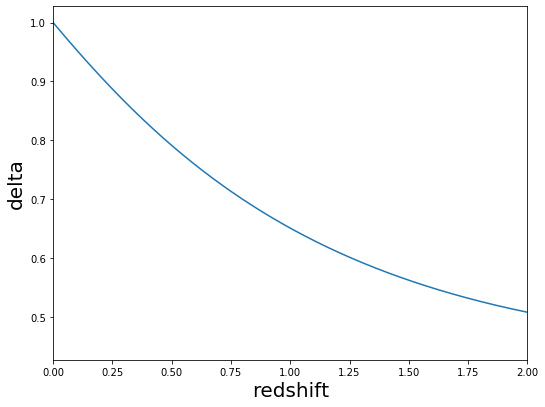

In [3]:
## solving second derivative of delta(z) in respect of redshift.
## for initial value i used the result i get above! 

from math import sqrt, exp
import matplotlib.pyplot as plt

OmgM = 0.3

def E_inverse(z):
    Ez = np.sqrt((1-OmgM)+ (OmgM * np.power(1 + z,3)))
    return 1. / Ez



def omega_M(z):
    omega = OmgM*((1+z)**3)* ((E_inverse(z))**2)
    return omega

def E_inverse3(a):
    Ez = np.sqrt((1-OmgM)+ (OmgM/(a**3) ))
    return 1. / Ez


def omega_M3(a):
    omega = (OmgM* ((E_inverse3(a))**2))/(a**3)
    return omega

def RungeKutta4(x0, xn, y0, z0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    ylist = [0] * (n + 1)
    zlist = [0] * (n + 1)

    xlist[0] = x = x0
    ylist[0] = y = y0
    zlist[0] = z = z0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * f(x, y, z)
        l1 = h * g(x, y, z)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        l2 = h * g(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        l3 = h * g(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        k4 = h * f(x + h, y + k2, z + l2)
        l4 = h * g(x + h, y + k2, z + l2)
        xlist[i] = x = x0 + i * h
        ylist[i] = y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        zlist[i] = z = z + (l1 + 2*l2 + 2*l3 + l4) / 6

    return xlist, ylist,zlist

Omm_0 = 0.3
Oml_0 = 0.7

# x as redshift
# y as delta
# z or f as derivative of delta 
# g as a second derivative of delta

def g(x, y, z):
    # z' = -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y
    # z' = -(((-1.5*Omm_0*(np.power(x,-4)))/((Omm_0*(np.power(x,-3)))+Oml_0))+(3/x))*z+((1.5*x*omega_M3(x))*y)
    # z' = -((-1.5*Omm_0)/((x**4)*(((Omm_0)/(x**3))+Oml_0))+(3/x))*z+((1.5/(x**2))*y)
    # z' = -((-1.5*Omm_0)/((x**4)*(((Omm_0)/(x**3))+Oml_0))+(3/x))*z+((1.5/(x**2))*omega_M3(x)*y)
    return  -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y


def f(x, y, z):
    # y' = z
    return z


def plot(x1, y1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, 
             label='Numerical Solution')
    #plt.xlim(0.5,1)
    equation = "perturbation"
    name = "laya"
    university = "SUT"
    title = '%s, h = %s, The Runge–Kutta method by %s, %s' %(equation, h, name, university)
    plt.title(title, fontsize=20)
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('delta', fontsize=20)
    plt.ylim(0.1,1.5)
    plt.xlim(0,2) 
    plt.legend(loc='upper right')
    plt.show()

if __name__ == '__main__':
    
    x0 = 0
    xn = 9
    h1 = 0.001
    y0 = 1
    z0 = -.48

    xlist3, ylist3,zlist3 = RungeKutta4(x0, xn, y0, z0, h1)


    #plot(xlist3, ylist3, h1)
#print(ylist1)


    
import matplotlib.pyplot as plt 
plt.figure(figsize=(8.5, 6.5))

plt.plot(xlist3,ylist3)

plt.xlabel("redshift" , fontsize=20)
plt.ylabel("delta" , fontsize=20)

plt.xlim(0,2) 
#plt.ylim(0.3,1.5)
print(np.size(ylist3))
#print(zlist1)




9001


Text(0, 0.5, 'f(z)')

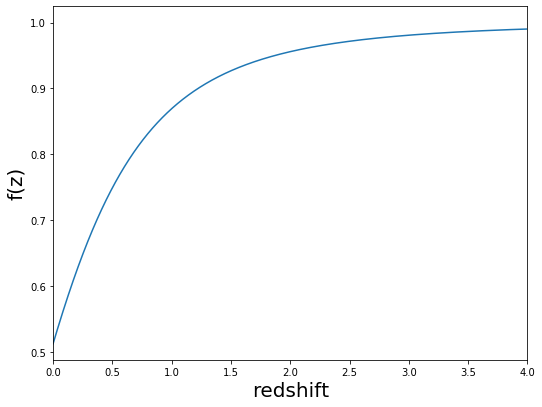

In [4]:
## solving f(a) not f(z). next part we solve f(z).
## everything here is fine even initial values. you can use it without any fear!

import matplotlib.pyplot as plt
%matplotlib inline



def E_inverse3(a):
    Ez = np.sqrt((1-OmgM)+ (OmgM/(a**3) ))
    return 1. / Ez


def omega_M3(a):
    omega = (OmgM* ((E_inverse3(a))**2))/(a**3)
    return omega

# x as scale factor
# f as growth rate

def growth(x, f):
    return -((f**2)/(x))-(((0.5+1.5*(1-omega_M3(x)))*f)/(x))+(1.5*omega_M3(x))/(x)


def RungeKutta4(x0, xn, f0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    flist = [0] * (n + 1)
    

    xlist[0] = x = x0
    flist[0] = f = f0

    for i in range(1, n + 1):
        
        k1 = h * growth(x, f)
        k2 = h * growth(x + 0.5 * h, f + 0.5 * k1)
        k3 = h * growth(x + 0.5 * h, f + 0.5 * k2)
        k4 = h * growth(x + h, f + k2)
    
        xlist[i] = x = x0 + i * h
        flist[i] = f = f + (k1 + 2*k2 + 2*k3 + k4) / 6

    return xlist, flist


def plot(x1, y1, color1, linestyle1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, color=color1, linestyle=linestyle1,
             label='Numerical Solution')
    
    
    plt.xlabel('a', fontsize=20)
    plt.ylabel('f(a)', fontsize=20)
    #plt.ylim(0.1,0.7)
    #plt.ylim(0,1)  
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == '__main__':
    
    x0 = 0.1
    xn = 1
    h1 = 0.0001
    
    f0 = 1
    
    
    
    

    xlist1, flist1 = RungeKutta4(x0, xn, f0, h1)


    #plot(xlist1, flist1,  'blue',  'solid',  h1)
    
print(np.size(flist1))
plt.figure(figsize=(8.5, 6.5))
plt.plot(zz,flist1)
plt.xlim(0,4)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('f(z)', fontsize=20)
#print(flist1)

9001


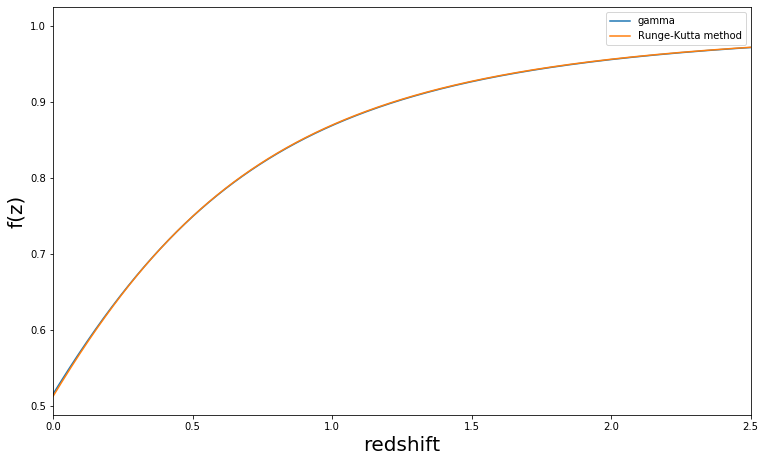

In [11]:
## solving f(z) here. start from z = 9 and initial f(9) = 1. not very bad initial value. 


import matplotlib.pyplot as plt
%matplotlib inline


def E_inverse(z):
    Ez = np.sqrt((1-OmgM)+ (OmgM * np.power(1 + z,3)))
    return 1. / Ez

om = 0.3
ol = 0.7

def omega_M(z):
    omega = OmgM*((1+z)**3)* ((E_inverse(z))**2)
    return omega

## growth factor equation
# t as z 
# f as growth rate
def growth(t, f):
    # y'= ((f**2)/(1+t))+((2/(1+t))-((1.5*(om*((1+t)**2)))/((om*((1+t)**3))+ol)))*f-((1.5*omega_M(t))/(1+t))
    # y' = ((f**2)/(1+t))+(((0.5+(1.5*(1-omega_M(t))))*f)/(1+t))-((1.5*omega_M(t))/(1+t))
    return ((f**2)/(1+t))+((2/(1+t))-((1.5*(om*((1+t)**2)))/((om*((1+t)**3))+ol)))*f-((1.5*omega_M(t))/(1+t))


def RungeKutta4(t0, tn, f0, h):

    n = int((tn - t0)/h)
    # Containers for solutions
    tlist = [0] * (n + 1)
    flist = [0] * (n + 1)
    

    tlist[0] = t = t0
    flist[0] = f = f0

    for i in range(1, n + 1):
        
        k1 = h * growth(t, f)
        k2 = h * growth(t + 0.5 * h, f + 0.5 * k1)
        k3 = h * growth(t + 0.5 * h, f + 0.5 * k2)
        k4 = h * growth(t + h, f + k2)
    
        tlist[i] = t = t0 + i * h
        flist[i] = f = f + (k1 + 2*k2 + 2*k3 + k4) / 6

    return tlist, flist


def plot(x1, y1, color1, linestyle1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, color=color1, linestyle=linestyle1,
             label='Numerical Solution')
    

    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('f(z)', fontsize=20)
    plt.ylim(0,2)
    #plt.ylim(0,1)  
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == '__main__':
    
    t0 = 9
    tn = 0
    h1 = -0.001
    
    f0 = 1
    

    tlist2, flist2 = RungeKutta4(t0, tn, f0, h1)


    #plot(tlist2, flist2,  'blue',  'solid',  h1)
    
n=9001
fz = np.zeros(n)
for i in range (0,n):
    fz[i] = ((OmgM*((1+tlist2[i])**3))/((OmgM*((1+tlist2[i])**3))+1-OmgM))**0.55



    

print(np.size(flist2))
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist2,fz,label="gamma" )
plt.plot(tlist2,flist2, label = "Runge-Kutta method")
plt.xlim(0,2.5)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('f(z)', fontsize=20)
plt.legend()
#print(flist1)
plt.savefig("f")

Text(0, 0.5, '$f(z) - \\Omega^{\\gamma}$')

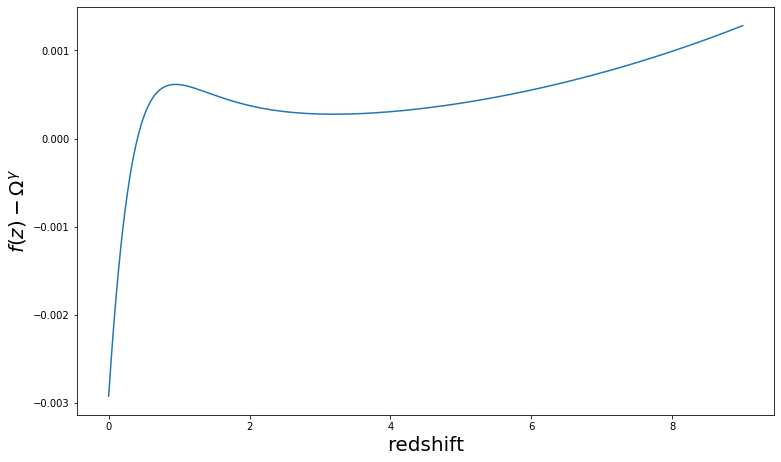

In [12]:
diff = np.zeros(n)
for i in range (0,n):
    diff[i] = flist2[i] - fz[i]
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist2,diff)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('$f(z) - \Omega^{\gamma}$', fontsize=20)

In [13]:
## to solve sigma_8 i used the initial value for delta which was derived. delta0 = 0.7897040

m = 9001
sigma8_0 = 0.8111 

fsigma8_1 = np.zeros(m)

for i in range(0,m):
    fsigma8_1[i] = (sigma8_0*flist1[i]*ylist1[i])/(0.7897040237350201)
    


In [14]:
m = 9001
sigma8_0 = 0.8111 

fsigma8_2 = np.zeros(m)

for i in range(0,m):
    fsigma8_2[i] = sigma8_0*flist2[i]*ylist3[m-i-1]

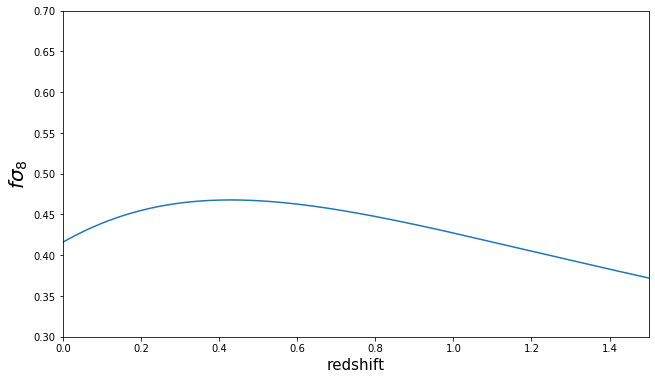

In [29]:
plt.figure(figsize=(10.5, 6))
plt.plot(zz,fsigma8_1)
plt.xlim(0,1.5)
plt.ylim(0.3,0.7)
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)
plt.savefig("fsigma8")

In [26]:
"""
plt.figure(figsize=(8.5, 5.5))
plt.plot(tlist2,fsigma8_2)
plt.xlim(0,1.5)
plt.ylim(0.3,0.7)
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)
"""

'\nplt.figure(figsize=(8.5, 5.5))\nplt.plot(tlist2,fsigma8_2)\nplt.xlim(0,1.5)\nplt.ylim(0.3,0.7)\nplt.xlabel("redshift",fontsize=15)\nplt.ylabel("$f \\sigma_8$",fontsize=20)\n'

1000


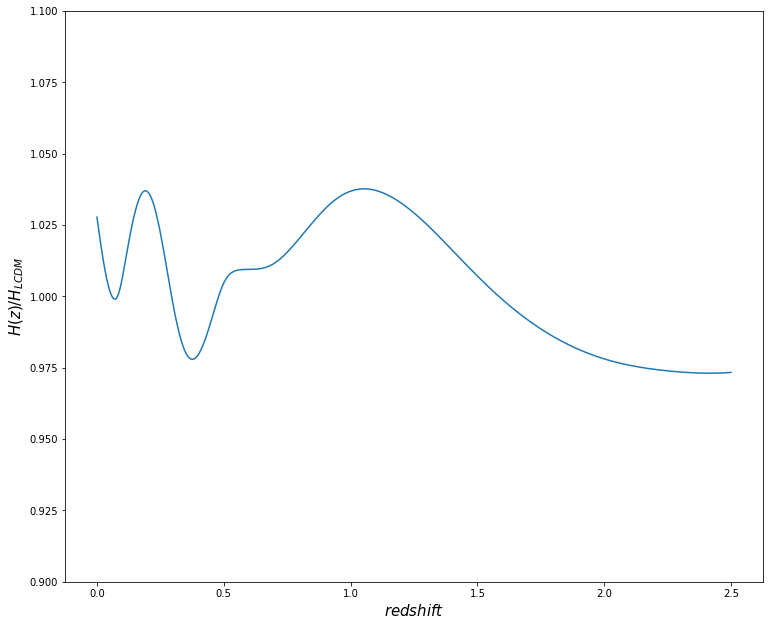

In [17]:
# Loading data
import matplotlib.pyplot as plt
import numpy as np
z, H_z, sig_error , Hz_psig , Hz_msig = np.loadtxt("derived_reconH.dat", unpack=True)
z , D_LCDM ,H_LCDM = np.loadtxt("LCDM_derived.dat", unpack=True)

n = np.size(z)
h = np.zeros(n)
print(n)
for i in range(0,n):
    h[i] = H_z[i]/H_LCDM[i]
plt.figure(figsize=(12.5, 10.5))
# Checking
plt.xlabel(r"$redshift$" ,fontsize=15)
plt.ylabel(r"$H(z)/H_{LCDM}$" ,fontsize=15)
plt.ylim(.9,1.1)
plt.plot(z,h)

In [18]:
n = np.size(z)

a = np.zeros(n)
for i in range(0,n):
    a[i] = 1/(1+z[i])
#print(a)
# a_min = 0.28571429

1000


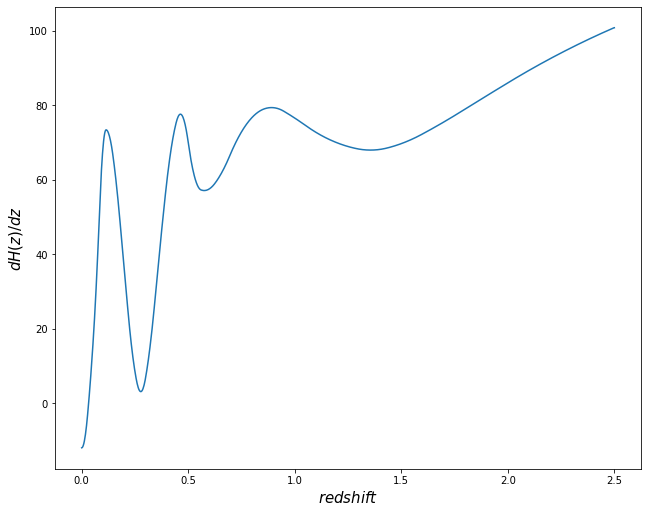

In [19]:
### Derivative of Hubble parameter

dH = np.zeros_like(z)       # dH/dz

dz = z[1] - z[0]

# Internal mesh points
for i in range(1, n-1):
    dH[i] = (H_z[i+1] - H_z[i-1])/(2*dz)
    # End points
    
dH[0]  = (H_z[1]  - H_z[0]) /dz
dH[-1] = (H_z[-1] - H_z[-2])/dz
#print(dH)
print(np.size(dH))
plt.figure(figsize=(10.5, 8.5))
plt.plot(z,dH)

# Checking
plt.xlabel(r"$redshift$" ,fontsize=15)
plt.ylabel(r"$dH(z)/dz$" ,fontsize=15)

plt.savefig("dH")

In [30]:
dH_p = np.zeros_like(z)       # dH/dz

dz = z[1] - z[0]

# Internal mesh points
for i in range(1, n-1):
    dH_p[i] = (Hz_psig[i+1] - Hz_psig[i-1])/(2*dz)
    # End points
    
dH_p[0]  = (Hz_psig[1]  - Hz_psig[0]) /dz
dH_p[-1] = (Hz_psig[-1] - Hz_psig[-2])/dz
#print(dH)
print(np.size(dH_p))

1000


In [31]:
dH_m = np.zeros_like(z)       # dH/dz

dz = z[1] - z[0]

# Internal mesh points
for i in range(1, n-1):
    dH_m[i] = (Hz_msig[i+1] - Hz_msig[i-1])/(2*dz)
    # End points
    
dH_m[0]  = (Hz_msig[1]  - Hz_msig[0]) /dz
dH_m[-1] = (Hz_msig[-1] - Hz_msig[-2])/dz
#print(dH)
print(np.size(dH_m))



1000


In [32]:
#for LCDM
dHL = np.zeros_like(z)       # dH/dz

dz = z[1] - z[0]

# Internal mesh points
for i in range(1, n-1):
    dHL[i] = (H_LCDM[i+1] - H_LCDM[i-1])/(2*dz)
    # End points
    
dHL[0]  = (H_LCDM[1]  - H_LCDM[0]) /dz
dHL[-1] = (H_LCDM[-1] - H_LCDM[-2])/dz
#print(dH)
print(np.size(dHL))


1000


In [33]:
### Derivative of Hubble parameter

dz1 = np.diff(z)
dh = np.diff(H_z)

dH1 = dh/dz1
print(np.size(dH1))



999


In [34]:
def Ez(t):
    
    i = int(t/0.0025025025025025)
    E = (H_z[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH[i])/70.3
    
    return dE

In [35]:
def Ez_p(t):
    
    i = int(t/0.0025025025025025)
    E = (Hz_psig[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_p(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH_p[i])/70.3
    
    return dE

In [36]:
def Ez_m(t):
    
    i = int(t/0.0025025025025025)
    E = (Hz_msig[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_m(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH_m[i])/70.3
    
    return dE

In [37]:
def Ez_L(t):
    
    i = int(t/0.0025025025025025)
    E = H_LCDM[i]
    
    return E
            
#print(Ez(2.5))

def dEdz_L(t):
    
    i = int(t/0.0025025025025025)
    dE = dHL[i]
    
    return dE

In [38]:
def Ea(t):
    a = (1/t)-1
    i = int(a/0.0025025025025025)+1
    E = H_z[i]
    
    return E
            
#print(Ez(2.5))

def dEda(t):
    a = (1/t)-1
    i = int(a/0.0025025025025025)+1
    dE = dH[i]
    
    return dE
    
print(dEda(0.28571429))   

100.83063510212516


2500


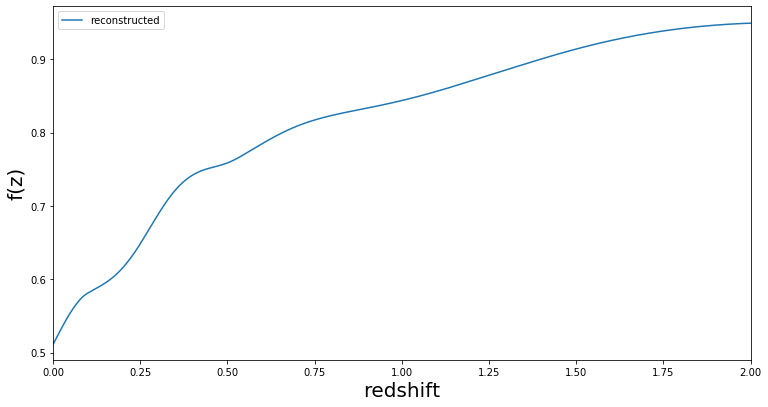

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

# Equation (change the returning function to the equation you need to approximate)
## good result! done.

def Ez(t):
    
    i = int(t/0.0025025025025025)
    E = (H_z[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH[i])/70.3
    
    return dE
    
om = 0.3
ol = 0.7


def growth(t, f):
    # y'= ((f**2)/(1+t))+((2/(1+t))-((1.5*(om*((1+t)**2)))/((om*((1+t)**3))+ol)))*f-((1.5*omega_M(t))/(1+t))
    # y' = ((f**2)/(1+t))+(((0.5+(1.5*(1-omega_M(t))))*f)/(1+t))-((1.5*omega_M(t))/(1+t))
    return ((f**2)/(1+t))+((2/(1+t))-(dEdz(t))/Ez(t))*f-((1.5*om*((1+t)**2))/((Ez(t))**2))


def RungeKutta4(t0, tn, f0, h):

    n = int((tn - t0)/h)
    # Containers for solutions
    tlist = [0] * (n + 1)
    flist = [0] * (n + 1)
    

    tlist[0] = t = t0
    flist[0] = f = f0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * growth(t, f)
        k2 = h * growth(t + 0.5 * h, f + 0.5 * k1)
        k3 = h * growth(t + 0.5 * h, f + 0.5 * k2)
        k4 = h * growth(t + h, f + k2)
    
        tlist[i] = t = t0 + i * h
        flist[i] = f = f + (k1 + 2*k2 + 2*k3 + k4) / 6

    return tlist, flist


def plot(x1, y1, color1, linestyle1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, color=color1, linestyle=linestyle1,
             label='Numerical Solution')
    
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('f(z)', fontsize=20)
    plt.ylim(0,2)
    #plt.ylim(0,1)  
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == '__main__':
    
    t0 = 2.5
    tn = 0.001
    h1 = -0.001
    
    f0 = .94
    
    
    tlist3, flist3 = RungeKutta4(t0, tn, f0, h1)


    #plot(tlist2, flist2,  'blue',  'solid',  h1)
    
print(np.size(flist3))
plt.figure(figsize=(12.5, 6.5))
plt.plot(tlist3,flist3, label = "reconstructed")
plt.xlim(0,2)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('f(z)', fontsize=20)
plt.savefig("f_reconstructed")
plt.legend()
#print(flist1)

2500


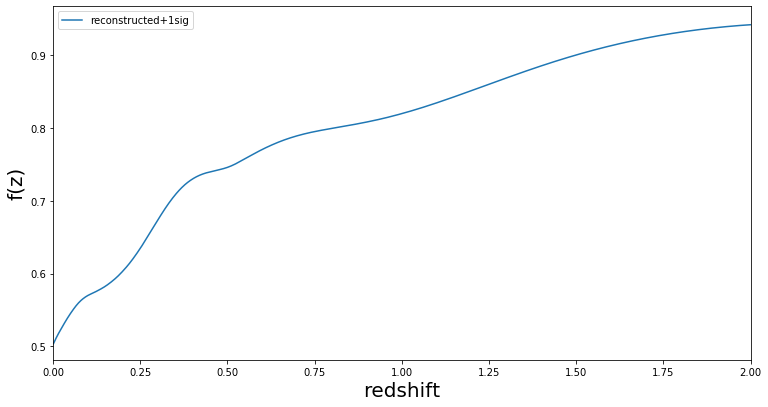

In [103]:
## plus 1 sigma
import matplotlib.pyplot as plt
%matplotlib inline

# Equation (change the returning function to the equation you need to approximate)
## good result! done.

def Ez_p(t):
    
    i = int(t/0.0025025025025025)
    E = (Hz_psig[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_p(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH_p[i])/70.3
    
    return dE
    
om = 0.3
ol = 0.7


def growth(t, f):
    # y'= ((f**2)/(1+t))+((2/(1+t))-((1.5*(om*((1+t)**2)))/((om*((1+t)**3))+ol)))*f-((1.5*omega_M(t))/(1+t))
    # y' = ((f**2)/(1+t))+(((0.5+(1.5*(1-omega_M(t))))*f)/(1+t))-((1.5*omega_M(t))/(1+t))
    return ((f**2)/(1+t))+((2/(1+t))-(dEdz_p(t))/Ez_p(t))*f-((1.5*om*((1+t)**2))/((Ez_p(t))**2))


def RungeKutta4(t0, tn, f0, h):

    n = int((tn - t0)/h)
    # Containers for solutions
    tlist = [0] * (n + 1)
    flist = [0] * (n + 1)
    

    tlist[0] = t = t0
    flist[0] = f = f0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * growth(t, f)
        k2 = h * growth(t + 0.5 * h, f + 0.5 * k1)
        k3 = h * growth(t + 0.5 * h, f + 0.5 * k2)
        k4 = h * growth(t + h, f + k2)
    
        tlist[i] = t = t0 + i * h
        flist[i] = f = f + (k1 + 2*k2 + 2*k3 + k4) / 6

    return tlist, flist


def plot(x1, y1, color1, linestyle1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, color=color1, linestyle=linestyle1,
             label='Numerical Solution')
    
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('f(z)', fontsize=20)
    plt.ylim(0,2)
    #plt.ylim(0,1)  
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == '__main__':
    
    t0 = 2.5
    tn = 0.001
    h1 = -0.001
    
    f0 = .94
    
    
    tlist7, flist7 = RungeKutta4(t0, tn, f0, h1)


    #plot(tlist2, flist2,  'blue',  'solid',  h1)
    
print(np.size(flist7))
plt.figure(figsize=(12.5, 6.5))
plt.plot(tlist7,flist7, label = "reconstructed+1sig")
plt.xlim(0,2)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('f(z)', fontsize=20)
plt.savefig("f_reconstructed+1sigma")
plt.legend()
#print(flist1)

2500


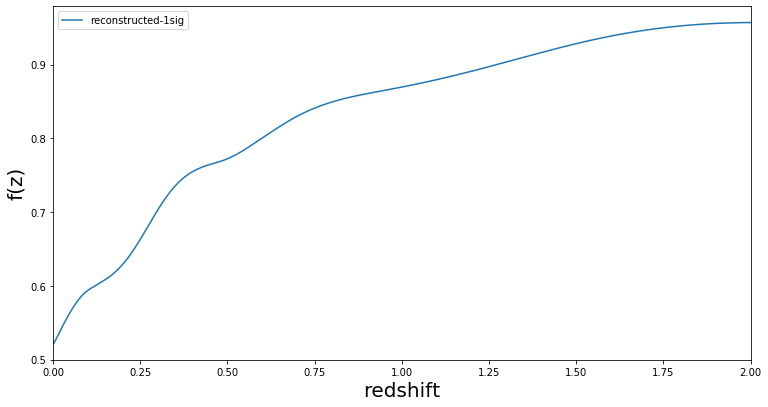

In [104]:
## minus 1 sigma
import matplotlib.pyplot as plt
%matplotlib inline

# Equation (change the returning function to the equation you need to approximate)
## good result! done.

def Ez_m(t):
    
    i = int(t/0.0025025025025025)
    E = (Hz_msig[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_m(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH_m[i])/70.3
    
    return dE
    
om = 0.3
ol = 0.7


def growth(t, f):
    # y'= ((f**2)/(1+t))+((2/(1+t))-((1.5*(om*((1+t)**2)))/((om*((1+t)**3))+ol)))*f-((1.5*omega_M(t))/(1+t))
    # y' = ((f**2)/(1+t))+(((0.5+(1.5*(1-omega_M(t))))*f)/(1+t))-((1.5*omega_M(t))/(1+t))
    return ((f**2)/(1+t))+((2/(1+t))-(dEdz_m(t))/Ez_m(t))*f-((1.5*om*((1+t)**2))/((Ez_m(t))**2))


def RungeKutta4(t0, tn, f0, h):

    n = int((tn - t0)/h)
    # Containers for solutions
    tlist = [0] * (n + 1)
    flist = [0] * (n + 1)
    

    tlist[0] = t = t0
    flist[0] = f = f0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * growth(t, f)
        k2 = h * growth(t + 0.5 * h, f + 0.5 * k1)
        k3 = h * growth(t + 0.5 * h, f + 0.5 * k2)
        k4 = h * growth(t + h, f + k2)
    
        tlist[i] = t = t0 + i * h
        flist[i] = f = f + (k1 + 2*k2 + 2*k3 + k4) / 6

    return tlist, flist


def plot(x1, y1, color1, linestyle1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, color=color1, linestyle=linestyle1,
             label='Numerical Solution')
    
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('f(z)', fontsize=20)
    plt.ylim(0,2)
    #plt.ylim(0,1)  
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == '__main__':
    
    t0 = 2.5
    tn = 0.001
    h1 = -0.001
    
    f0 = .94
    
    
    tlist8, flist8 = RungeKutta4(t0, tn, f0, h1)


    #plot(tlist2, flist2,  'blue',  'solid',  h1)
    
print(np.size(flist8))
plt.figure(figsize=(12.5, 6.5))
plt.plot(tlist8,flist8, label = "reconstructed-1sig")
plt.xlim(0,2)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('f(z)', fontsize=20)
plt.savefig("f_reconstructed-1sigma")
plt.legend()
#print(flist1)

2500


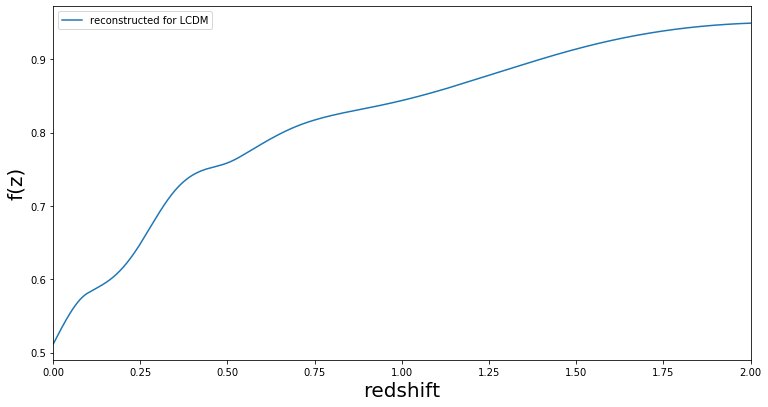

In [105]:
## for LCDM
import matplotlib.pyplot as plt
%matplotlib inline

# Equation (change the returning function to the equation you need to approximate)
## good result! done.

def Ez_L(t):
    
    i = int(t/0.0025025025025025)
    E = (H_LCDM[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_L(t):
    
    i = int(t/0.0025025025025025)
    dE = (dHL[i])/70.3
    
    return dE
    
om = 0.3
ol = 0.7


def growth(t, f):
    # y'= ((f**2)/(1+t))+((2/(1+t))-((1.5*(om*((1+t)**2)))/((om*((1+t)**3))+ol)))*f-((1.5*omega_M(t))/(1+t))
    # y' = ((f**2)/(1+t))+(((0.5+(1.5*(1-omega_M(t))))*f)/(1+t))-((1.5*omega_M(t))/(1+t))
    return ((f**2)/(1+t))+((2/(1+t))-(dEdz_L(t))/Ez_L(t))*f-((1.5*om*((1+t)**2))/((Ez_L(t))**2))


def RungeKutta4(t0, tn, f0, h):

    n = int((tn - t0)/h)
    # Containers for solutions
    tlist = [0] * (n + 1)
    flist = [0] * (n + 1)
    

    tlist[0] = t = t0
    flist[0] = f = f0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * growth(t, f)
        k2 = h * growth(t + 0.5 * h, f + 0.5 * k1)
        k3 = h * growth(t + 0.5 * h, f + 0.5 * k2)
        k4 = h * growth(t + h, f + k2)
    
        tlist[i] = t = t0 + i * h
        flist[i] = f = f + (k1 + 2*k2 + 2*k3 + k4) / 6

    return tlist, flist


def plot(x1, y1, color1, linestyle1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, color=color1, linestyle=linestyle1,
             label='Numerical Solution')
    
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('f(z)', fontsize=20)
    plt.ylim(0,2)
    #plt.ylim(0,1)  
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == '__main__':
    
    t0 = 2.5
    tn = 0.001
    h1 = -0.001
    
    f0 = .94
    
    
    tlist4, flist4 = RungeKutta4(t0, tn, f0, h1)


    #plot(tlist2, flist2,  'blue',  'solid',  h1)
    
print(np.size(flist3))
plt.figure(figsize=(12.5, 6.5))
plt.plot(tlist3,flist3, label = "reconstructed for LCDM")
plt.xlim(0,2)
plt.xlabel('redshift', fontsize=20)
plt.ylabel('f(z)', fontsize=20)
plt.savefig("f_reconstructed")
plt.legend()
#print(flist1)

2500


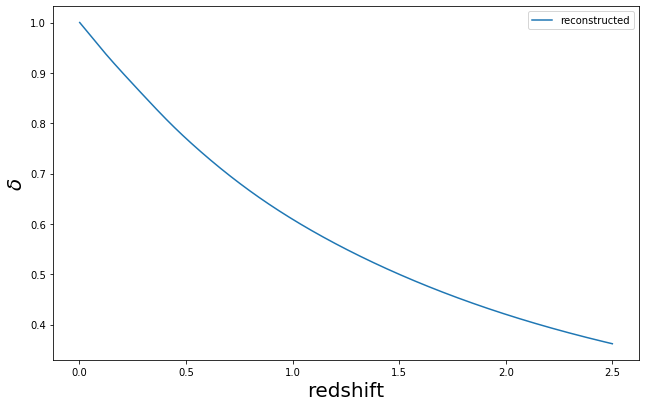

In [106]:
from math import sqrt, exp
import matplotlib.pyplot as plt

OmgM = 0.3

def Ez(t):
    
    i = int(t/0.0025025025025025)
    E = (H_z[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH[i])/70.3
    
    return dE


def RungeKutta4(x0, xn, y0, z0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    ylist = [0] * (n + 1)
    zlist = [0] * (n + 1)

    xlist[0] = x = x0
    ylist[0] = y = y0
    zlist[0] = z = z0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * f(x, y, z)
        l1 = h * g(x, y, z)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        l2 = h * g(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        l3 = h * g(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        k4 = h * f(x + h, y + k2, z + l2)
        l4 = h * g(x + h, y + k2, z + l2)
        xlist[i] = x = x0 + i * h
        ylist[i] = y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        zlist[i] = z = z + (l1 + 2*l2 + 2*l3 + l4) / 6

    return xlist, ylist,zlist

Omm_0 = 0.3
Oml_0 = 0.7

# x as redshift
# y as delta
# z or f as derivative of delta 
# g as a second derivative of delta


def g(x, y, z):
    # z' = -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y
    
    return  -(((dEdz(x))/Ez(x))-1/(1+x))*z+1.5*Omm_0*((1+x)/((Ez(x))**2))*y


def f(x, y, z):
    # y' = z
    return z


def plot(x1, y1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, 
             label='Numerical Solution')
    #plt.xlim(0.5,1)
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('$\delta$', fontsize=25)
    #plt.ylim(0.1,0.7)
    plt.xlim(0,2) 
    plt.legend(loc='upper right')
    plt.show()
    plt.savefig("delta_reconstructed")

if __name__ == '__main__':
    
    x0 = 0.001
    xn = 2.5
    h1 = 0.001
    y0 = 1
    z0 = -0.5127962477303042

    xlist4, ylist4,zlist4 = RungeKutta4(x0, xn, y0, z0, h1)


    #plot(xlist4, ylist4, h1)
    #plt.savefig("delta_reconstructed")
    
    
import matplotlib.pyplot as plt 
plt.figure(figsize=(10.5, 6.5))

plt.plot(xlist4, ylist4, label = "reconstructed")
plt.xlabel("redshift" , fontsize=20)
plt.ylabel("$\delta$" , fontsize=20)
plt.legend()
plt.savefig("delta_reconstructed")

print(np.size(ylist4))




2500


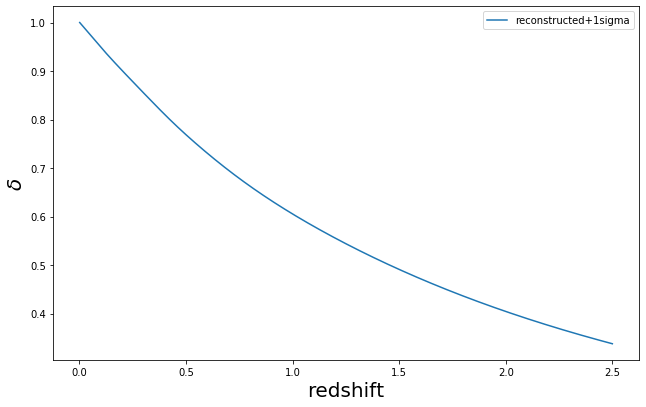

In [107]:
# plus 1 sigma
from math import sqrt, exp
import matplotlib.pyplot as plt

OmgM = 0.3

def Ez_p(t):
    
    i = int(t/0.0025025025025025)
    E = (Hz_psig[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_p(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH_p[i])/70.3
    
    return dE


def RungeKutta4(x0, xn, y0, z0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    ylist = [0] * (n + 1)
    zlist = [0] * (n + 1)

    xlist[0] = x = x0
    ylist[0] = y = y0
    zlist[0] = z = z0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * f(x, y, z)
        l1 = h * g(x, y, z)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        l2 = h * g(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        l3 = h * g(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        k4 = h * f(x + h, y + k2, z + l2)
        l4 = h * g(x + h, y + k2, z + l2)
        xlist[i] = x = x0 + i * h
        ylist[i] = y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        zlist[i] = z = z + (l1 + 2*l2 + 2*l3 + l4) / 6

    return xlist, ylist,zlist

Omm_0 = 0.3
Oml_0 = 0.7

# x as redshift
# y as delta
# z or f as derivative of delta 
# g as a second derivative of delta


def g(x, y, z):
    # z' = -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y
    
    return  -(((dEdz_p(x))/Ez_p(x))-1/(1+x))*z+1.5*Omm_0*((1+x)/((Ez_p(x))**2))*y


def f(x, y, z):
    # y' = z
    return z


def plot(x1, y1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, 
             label='Numerical Solution')
    #plt.xlim(0.5,1)
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('$\delta$', fontsize=25)
    #plt.ylim(0.1,0.7)
    plt.xlim(0,2) 
    plt.legend(loc='upper right')
    plt.show()
    plt.savefig("delta_reconstructed")

if __name__ == '__main__':
    
    x0 = 0.001
    xn = 2.5
    h1 = 0.001
    y0 = 1
    z0 = -0.5127962477303042

    xlist11, ylist11,zlist11 = RungeKutta4(x0, xn, y0, z0, h1)


    #plot(xlist4, ylist4, h1)
    #plt.savefig("delta_reconstructed")
    
    
import matplotlib.pyplot as plt 
plt.figure(figsize=(10.5, 6.5))

plt.plot(xlist11, ylist11, label = "reconstructed+1sigma")
plt.xlabel("redshift" , fontsize=20)
plt.ylabel("$\delta$" , fontsize=20)
plt.legend()
plt.savefig("delta_reconstructed+1sigma")

print(np.size(ylist11))





2500


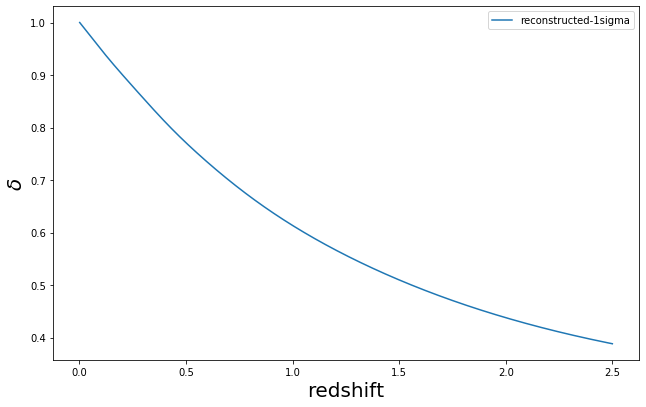

In [108]:
# Minus 1 sigma
from math import sqrt, exp
import matplotlib.pyplot as plt

OmgM = 0.3

def Ez_m(t):
    
    i = int(t/0.0025025025025025)
    E = (Hz_msig[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_m(t):
    
    i = int(t/0.0025025025025025)
    dE = (dH_m[i])/70.3
    
    return dE


def RungeKutta4(x0, xn, y0, z0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    ylist = [0] * (n + 1)
    zlist = [0] * (n + 1)

    xlist[0] = x = x0
    ylist[0] = y = y0
    zlist[0] = z = z0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * f(x, y, z)
        l1 = h * g(x, y, z)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        l2 = h * g(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        l3 = h * g(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        k4 = h * f(x + h, y + k2, z + l2)
        l4 = h * g(x + h, y + k2, z + l2)
        xlist[i] = x = x0 + i * h
        ylist[i] = y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        zlist[i] = z = z + (l1 + 2*l2 + 2*l3 + l4) / 6

    return xlist, ylist,zlist

Omm_0 = 0.3
Oml_0 = 0.7

# x as redshift
# y as delta
# z or f as derivative of delta 
# g as a second derivative of delta


def g(x, y, z):
    # z' = -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y
    
    return  -(((dEdz_m(x))/Ez_m(x))-1/(1+x))*z+1.5*Omm_0*((1+x)/((Ez_m(x))**2))*y


def f(x, y, z):
    # y' = z
    return z


def plot(x1, y1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, 
             label='Numerical Solution')
    #plt.xlim(0.5,1)
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('$\delta$', fontsize=25)
    #plt.ylim(0.1,0.7)
    plt.xlim(0,2) 
    plt.legend(loc='upper right')
    plt.show()
    plt.savefig("delta_reconstructed")

if __name__ == '__main__':
    
    x0 = 0.001
    xn = 2.5
    h1 = 0.001
    y0 = 1
    z0 = -0.5127962477303042

    xlist12, ylist12,zlist12 = RungeKutta4(x0, xn, y0, z0, h1)


    #plot(xlist4, ylist4, h1)
    #plt.savefig("delta_reconstructed")
    
    
import matplotlib.pyplot as plt 
plt.figure(figsize=(10.5, 6.5))

plt.plot(xlist12, ylist12, label = "reconstructed-1sigma")
plt.xlabel("redshift" , fontsize=20)
plt.ylabel("$\delta$" , fontsize=20)
plt.legend()
plt.savefig("delta_reconstructed-1sigma")

print(np.size(ylist12))






2500


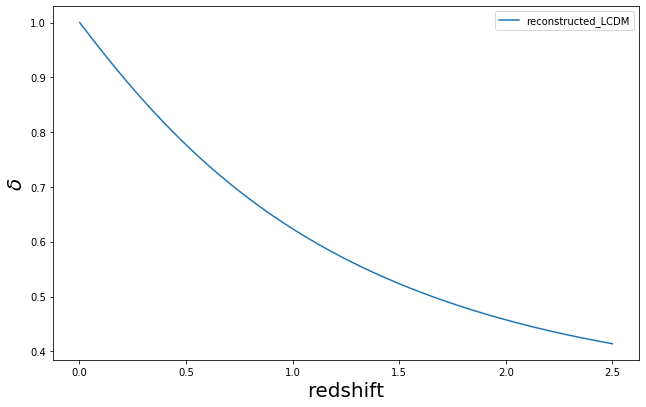

In [109]:
from math import sqrt, exp
import matplotlib.pyplot as plt

OmgM = 0.3

def Ez_L(t):
    
    i = int(t/0.0025025025025025)
    E = (H_LCDM[i])/70.3
    
    return E
            
#print(Ez(2.5))

def dEdz_L(t):
    
    i = int(t/0.0025025025025025)
    dE = (dHL[i])/70.3
    
    return dE

def RungeKutta4(x0, xn, y0, z0, h):

    n = int((xn - x0)/h)
    # Containers for solutions
    xlist = [0] * (n + 1)
    ylist = [0] * (n + 1)
    zlist = [0] * (n + 1)

    xlist[0] = x = x0
    ylist[0] = y = y0
    zlist[0] = z = z0

    for i in range(1, n + 1):
        # see https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        k1 = h * f(x, y, z)
        l1 = h * g(x, y, z)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        l2 = h * g(x + 0.5 * h, y + 0.5 * k1, z + 0.5*l1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        l3 = h * g(x + 0.5 * h, y + 0.5 * k2, z + 0.5*l2)
        k4 = h * f(x + h, y + k2, z + l2)
        l4 = h * g(x + h, y + k2, z + l2)
        xlist[i] = x = x0 + i * h
        ylist[i] = y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        zlist[i] = z = z + (l1 + 2*l2 + 2*l3 + l4) / 6

    return xlist, ylist,zlist

Omm_0 = 0.3
Oml_0 = 0.7

# x as redshift
# y as delta
# z or f as derivative of delta 
# g as a second derivative of delta


def g(x, y, z):
    # z' = -(((1.5*(Omm_0*((1+x)**2)))/((Omm_0*((1+x)**3))+Oml_0))-1/(1+x))*z+1.5*((omega_M(x))/((1+x)**2))*y
    
    return  -(((dEdz_L(x))/Ez_L(x))-1/(1+x))*z+1.5*Omm_0*((1+x)/((Ez_L(x))**2))*y


def f(x, y, z):
    # y' = z
    return z


def plot(x1, y1, h):

    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1600 / dpi, 900 / dpi))

    plt.plot(x1, y1, 
             label='Numerical Solution')
    #plt.xlim(0.5,1)
    
    plt.xlabel('redshift', fontsize=20)
    plt.ylabel('$\delta$', fontsize=25)
    #plt.ylim(0.1,0.7)
    plt.xlim(0,2) 
    plt.legend(loc='upper right')
    plt.show()
    plt.savefig("delta_reconstructed_LCDM")

if __name__ == '__main__':
    
    x0 = 0.001
    xn = 2.5
    h1 = 0.001
    y0 = 1
    z0 = -0.5127962477303042

    xlist5, ylist5,zlist5 = RungeKutta4(x0, xn, y0, z0, h1)


    #plot(xlist4, ylist4, h1)
    #plt.savefig("delta_reconstructed")
    
    
import matplotlib.pyplot as plt 
plt.figure(figsize=(10.5, 6.5))

plt.plot(xlist5, ylist5, label = "reconstructed_LCDM")
plt.xlabel("redshift" , fontsize=20)
plt.ylabel("$\delta$" , fontsize=20)
plt.legend()
plt.savefig("delta_reconstructed_LCDM")

print(np.size(ylist5))





In [110]:
m = 2500
sigma8_0 = 0.8111 

fsigma8_3 = np.zeros(m)

for i in range(0,m):
    fsigma8_3[i] = sigma8_0*flist3[i]*ylist4[m-1-i]

In [111]:
m = 2500
sigma8_0 = 0.8111 

fsigma8_4 = np.zeros(m)

for i in range(0,m):
    fsigma8_4[i] = sigma8_0*flist4[i]*ylist5[m-1-i]

In [112]:
m = 2500
sigma8_0 = 0.8111 

fsigma8_5 = np.zeros(m)

for i in range(0,m):
    fsigma8_5[i] = sigma8_0*flist7[i]*ylist11[m-1-i]

In [113]:
m = 2500
sigma8_0 = 0.8111 

fsigma8_6 = np.zeros(m)

for i in range(0,m):
    fsigma8_6[i] = sigma8_0*flist8[i]*ylist12[m-1-i]

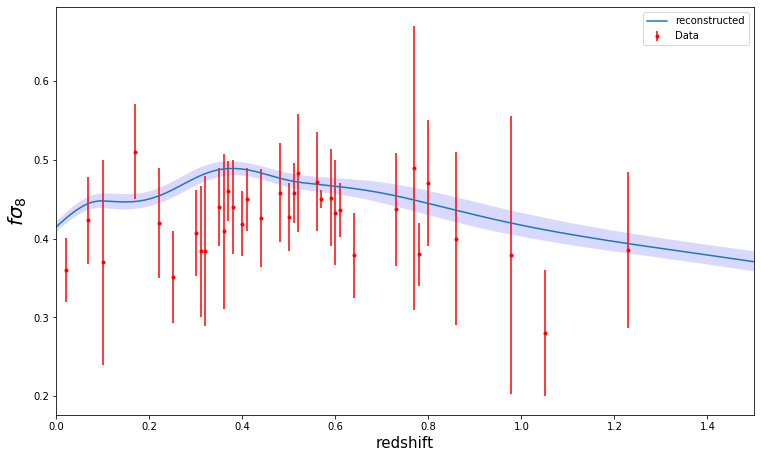

In [114]:
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist3,fsigma8_3, label ="reconstructed")
#plt.plot(tlist7,fsigma8_5, label ="reconstructed+1sigma")
#plt.plot(tlist8,fsigma8_6, label ="reconstructed-1sigma")
plt.fill_between(tlist7, fsigma8_5, fsigma8_6, facecolor="blue", alpha=0.15)
plt.xlim(0,1.5)
#plt.ylim(0.3,0.7)
z1, fsigma8, fsigma8_error  = np.loadtxt("fsigma8.txt", unpack=True)
plt.errorbar(z1, fsigma8, fsigma8_error, fmt='r.' , label = "Data")
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)

plt.legend()
plt.savefig("fsigma8_reconstructed")

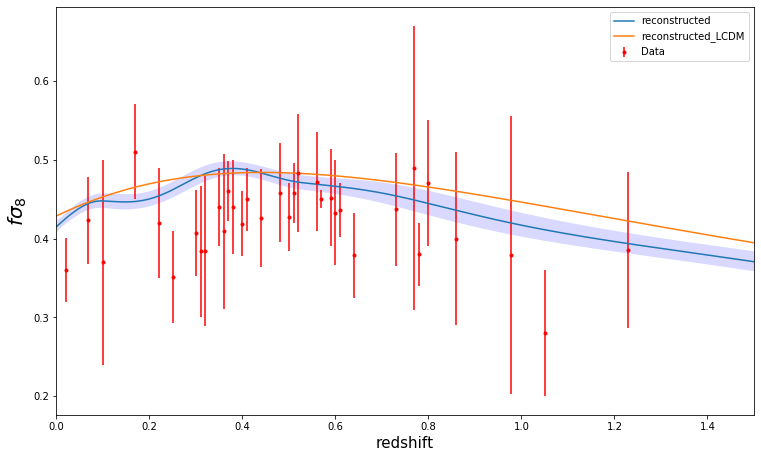

In [115]:
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist3,fsigma8_3, label ="reconstructed")
plt.plot(tlist4,fsigma8_4, label ="reconstructed_LCDM")
plt.fill_between(tlist7, fsigma8_5, fsigma8_6, facecolor="blue", alpha=0.15)
plt.xlim(0,1.5)
#plt.ylim(0.3,0.7)
z1, fsigma8, fsigma8_error  = np.loadtxt("fsigma8.txt", unpack=True)
plt.errorbar(z1, fsigma8, fsigma8_error, fmt='r.' , label = "Data")
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)

plt.legend()
plt.savefig("fsigma8_reconstructed11")

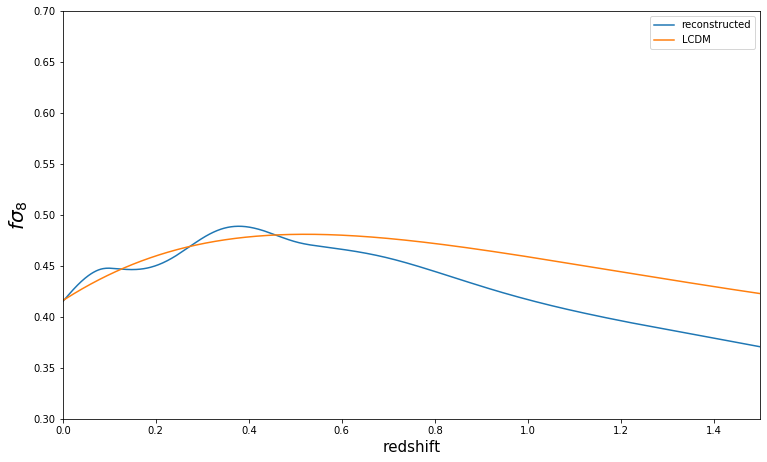

In [116]:
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist3,fsigma8_3, label ="reconstructed")

plt.plot(tlist2,fsigma8_2, label = "LCDM")
plt.xlim(0,1.5)
plt.ylim(0.3,0.7)
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)

plt.legend()
plt.savefig("reconsvsLCDM_reconstructed")

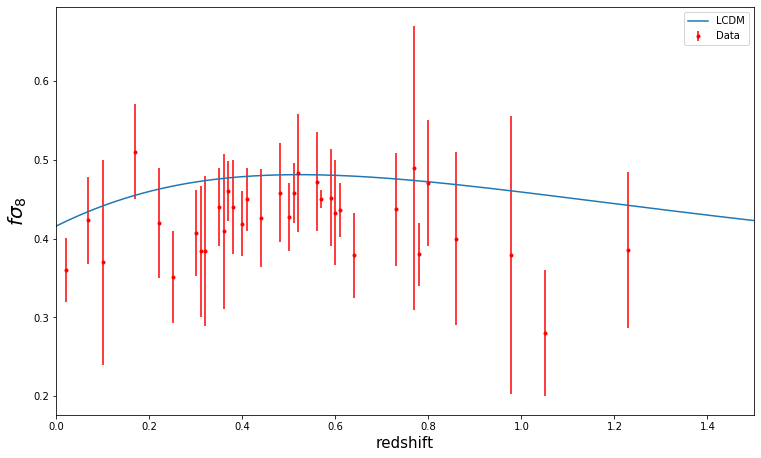

In [117]:
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist2,fsigma8_2, label = "LCDM")
plt.errorbar(z1, fsigma8, fsigma8_error, fmt='r.' , label = "Data")
plt.xlim(0,1.5)

#plt.ylim(0.3,0.7)
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)

plt.legend()



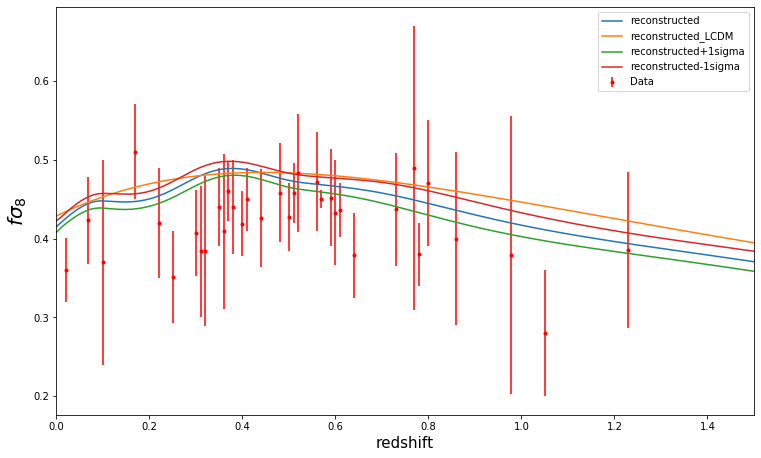

In [118]:
plt.figure(figsize=(12.5, 7.5))
plt.plot(tlist3,fsigma8_3, label ="reconstructed")
plt.plot(tlist4,fsigma8_4, label ="reconstructed_LCDM")
plt.plot(tlist7,fsigma8_5, label ="reconstructed+1sigma")
plt.plot(tlist8,fsigma8_6, label ="reconstructed-1sigma")
plt.xlim(0,1.5)
#plt.ylim(0.3,0.7)
z1, fsigma8, fsigma8_error  = np.loadtxt("fsigma8.txt", unpack=True)
plt.errorbar(z1, fsigma8, fsigma8_error, fmt='r.' , label = "Data")
plt.xlabel("redshift",fontsize=15)
plt.ylabel("$f \sigma_8$",fontsize=20)

plt.legend()
plt.savefig("fsigma8_reconstructed1")

In [137]:
m = np.size(fsigma8_3)
fs8 = np.zeros(m)
for i in range(0,m):
    fs8[i] = fsigma8_3[m-i-1]

tp = np.arange(0.001,2.5,0.001)

In [139]:
fs8_lcdm = np.zeros(m)

for i in range(0,m):
    fs8_lcdm[i] = fsigma8_4[m-i-1]

In [138]:
## chi-square for reconstructed XCDM
z_f, fsigma8_obs, err_fsigma8_obs = np.loadtxt("fsigma8.txt", unpack=True)

chisq1 = 0 

n = len(z_f)
fsigma8_reconst = np.zeros(n)
for i in range(0,n):
    fsigma8_reconst[i] = fs8[int((z_f[i]-0.001)/0.001)]
    
for z in z_vec:
    chisq1 = np.sum( np.power((fsigma8_reconst - fsigma8_obs) / err_fsigma8_obs, 2))

print(chisq1)

33.34818283685556


In [141]:
## chi-square for reconstructed LCDM

chisq2 = 0 

fsigma8_lcdm = np.zeros(n)

for i in range(0,n):
        fsigma8_lcdm[i] = fs8_lcdm[int((z_f[i]-0.001)/0.001)]
    
for z in z_vec:
    chisq2 = np.sum(np.power((fsigma8_lcdm - fsigma8_obs) / err_fsigma8_obs, 2))

print(chisq2)

45.94938504328182


In [143]:
## chi-square for reconstructed LCDM

chisq2 = 0 

fsigma8_lcdm = np.zeros(n)

for i in range(0,n):
        fsigma8_lcdm[i] = fs8_lcdm[int((z_f[i]-0.001)/0.001)]
    
for z in z_vec:
    chisq2 = np.sum(np.power((fsigma8_lcdm - fsigma8_obs) / err_fsigma8_obs, 2))

print(chisq2)

45.94938504328182
